In [40]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import time

In [41]:
df  = pd.read_csv(r'Fitabase Data\dailyActivity_merged.csv')
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [42]:
df.Id.nunique()

33

In [43]:
important_columns = ['Id' , 'ActivityDate' , 'TotalSteps' , 'VeryActiveMinutes' , 'FairlyActiveMinutes' , 'LightlyActiveMinutes' , 'SedentaryMinutes' ,	'Calories' ]
df = df[important_columns]
df

,Id,ActivityDate,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,25,13,328,728,1985
1,1503960366,4/13/2016,10735,21,19,217,776,1797
2,1503960366,4/14/2016,10460,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,29,34,209,726,1745
4,1503960366,4/16/2016,12669,36,10,221,773,1863
...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,88,12,213,1127,3832


In [44]:
df.rename( columns = {'ActivityDate' : 'date'} , inplace = True);
df.columns 

Index(['Id', 'date', 'TotalSteps', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [45]:
df['Total_Minutes'] = df[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']].sum(axis=1)
df

,Id,date,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Total_Minutes
0,1503960366,4/12/2016,13162,25,13,328,728,1985,1094
1,1503960366,4/13/2016,10735,21,19,217,776,1797,1033
2,1503960366,4/14/2016,10460,30,11,181,1218,1776,1440
3,1503960366,4/15/2016,9762,29,34,209,726,1745,998
4,1503960366,4/16/2016,12669,36,10,221,773,1863,1040
...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,17,4,245,1174,2847,1440
936,8877689391,5/9/2016,20226,73,19,217,1131,3710,1440
937,8877689391,5/10/2016,10733,18,11,224,1187,2832,1440
938,8877689391,5/11/2016,21420,88,12,213,1127,3832,1440


In [46]:
df['Total_Hours'] = round(df['Total_Minutes'] / 60)
df

,Id,date,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Total_Minutes,Total_Hours
0,1503960366,4/12/2016,13162,25,13,328,728,1985,1094,18.0
1,1503960366,4/13/2016,10735,21,19,217,776,1797,1033,17.0
2,1503960366,4/14/2016,10460,30,11,181,1218,1776,1440,24.0
3,1503960366,4/15/2016,9762,29,34,209,726,1745,998,17.0
4,1503960366,4/16/2016,12669,36,10,221,773,1863,1040,17.0
...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,17,4,245,1174,2847,1440,24.0
936,8877689391,5/9/2016,20226,73,19,217,1131,3710,1440,24.0
937,8877689391,5/10/2016,10733,18,11,224,1187,2832,1440,24.0
938,8877689391,5/11/2016,21420,88,12,213,1127,3832,1440,24.0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    940 non-null    int64  
 1   date                  940 non-null    object 
 2   TotalSteps            940 non-null    int64  
 3   VeryActiveMinutes     940 non-null    int64  
 4   FairlyActiveMinutes   940 non-null    int64  
 5   LightlyActiveMinutes  940 non-null    int64  
 6   SedentaryMinutes      940 non-null    int64  
 7   Calories              940 non-null    int64  
 8   Total_Minutes         940 non-null    int64  
 9   Total_Hours           940 non-null    float64
dtypes: float64(1), int64(8), object(1)
memory usage: 73.6+ KB


In [48]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Id                    940 non-null    int64         
 1   date                  940 non-null    datetime64[ns]
 2   TotalSteps            940 non-null    int64         
 3   VeryActiveMinutes     940 non-null    int64         
 4   FairlyActiveMinutes   940 non-null    int64         
 5   LightlyActiveMinutes  940 non-null    int64         
 6   SedentaryMinutes      940 non-null    int64         
 7   Calories              940 non-null    int64         
 8   Total_Minutes         940 non-null    int64         
 9   Total_Hours           940 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(8)
memory usage: 73.6 KB


In [49]:
df['Day_Of_Week'] = df['date'].dt.day_name()
df

,Id,date,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Total_Minutes,Total_Hours,Day_Of_Week
0,1503960366,2016-04-12,13162,25,13,328,728,1985,1094,18.0,Tuesday
1,1503960366,2016-04-13,10735,21,19,217,776,1797,1033,17.0,Wednesday
2,1503960366,2016-04-14,10460,30,11,181,1218,1776,1440,24.0,Thursday
3,1503960366,2016-04-15,9762,29,34,209,726,1745,998,17.0,Friday
4,1503960366,2016-04-16,12669,36,10,221,773,1863,1040,17.0,Saturday
...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,17,4,245,1174,2847,1440,24.0,Sunday
936,8877689391,2016-05-09,20226,73,19,217,1131,3710,1440,24.0,Monday
937,8877689391,2016-05-10,10733,18,11,224,1187,2832,1440,24.0,Tuesday
938,8877689391,2016-05-11,21420,88,12,213,1127,3832,1440,24.0,Wednesday


In [50]:
df.isnull().sum()

Id                      0
date                    0
TotalSteps              0
VeryActiveMinutes       0
FairlyActiveMinutes     0
LightlyActiveMinutes    0
SedentaryMinutes        0
Calories                0
Total_Minutes           0
Total_Hours             0
Day_Of_Week             0
dtype: int64

In [52]:
df.duplicated().sum()

0

In [54]:
df.describe( include= 'all' )

,Id,date,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Total_Minutes,Total_Hours,Day_Of_Week
count,9.400000e+02,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152
mean,4.855407e+09,2016-04-26 06:53:37.021276672,7637.910638,21.164894,13.564894,192.812766,991.210638,2303.609574,1218.753191,20.313830,NaN
min,1.503960e+09,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,NaN
25%,2.320127e+09,2016-04-19 00:00:00,3789.750000,0.000000,0.000000,127.000000,729.750000,1828.500000,989.750000,16.000000,NaN
50%,4.445115e+09,2016-04-26 00:00:00,7405.500000,4.000000,6.000000,199.000000,1057.500000,2134.000000,1440.000000,24.000000,NaN
75%,6.962181e+09,2016-05-04 00:00:00,10727.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,1440.000000,24.000000,NaN
max,8.877689e+09,2016-05-12 00:00:00,36019.000000,210.000000,143.000000,518.000000,1440.000000,4900.000000,1440.000000,24.000000,NaN


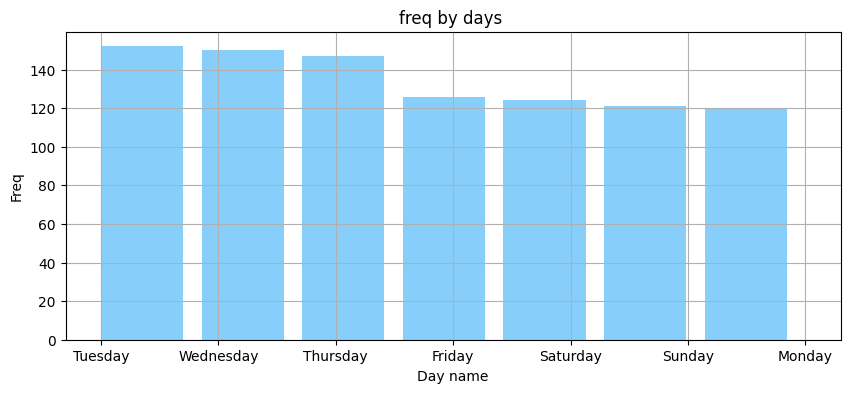

In [66]:
plt.figure(figsize=((10,4)))
plt.hist(df.Day_Of_Week , bins= 7 , color = 'lightskyblue' , width = 0.7)
plt.grid(True)
plt.title('freq by days ')
plt.xlabel('Day name')
plt.ylabel('Freq')
plt.show()

In [68]:
df

,Id,date,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Total_Minutes,Total_Hours,Day_Of_Week
0,1503960366,2016-04-12,13162,25,13,328,728,1985,1094,18.0,Tuesday
1,1503960366,2016-04-13,10735,21,19,217,776,1797,1033,17.0,Wednesday
2,1503960366,2016-04-14,10460,30,11,181,1218,1776,1440,24.0,Thursday
3,1503960366,2016-04-15,9762,29,34,209,726,1745,998,17.0,Friday
4,1503960366,2016-04-16,12669,36,10,221,773,1863,1040,17.0,Saturday
...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,17,4,245,1174,2847,1440,24.0,Sunday
936,8877689391,2016-05-09,20226,73,19,217,1131,3710,1440,24.0,Monday
937,8877689391,2016-05-10,10733,18,11,224,1187,2832,1440,24.0,Tuesday
938,8877689391,2016-05-11,21420,88,12,213,1127,3832,1440,24.0,Wednesday


In [69]:
df['Day_Of_Week'] = pd.to_numeric(df['Day_Of_Week'], errors='coerce')
df.corr()

,Id,date,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Total_Minutes,Total_Hours,Day_Of_Week
Id,1.000000,-0.015571,0.185721,0.303608,0.051158,-0.098754,-0.043319,0.396671,-0.048274,-0.048140,NaN
date,-0.015571,1.000000,-0.043931,-0.044200,0.025305,-0.049142,-0.095298,-0.092843,-0.131693,-0.132148,NaN
TotalSteps,0.185721,-0.043931,1.000000,0.667079,0.498693,0.569600,-0.327484,0.591568,-0.017285,-0.018152,NaN
VeryActiveMinutes,0.303608,-0.044200,0.667079,1.000000,0.312420,0.051926,-0.164671,0.615838,-0.018244,-0.021064,NaN
FairlyActiveMinutes,0.051158,0.025305,0.498693,0.312420,1.000000,0.148820,-0.237446,0.297623,-0.094155,-0.094941,NaN
LightlyActiveMinutes,-0.098754,-0.049142,0.569600,0.051926,0.148820,1.000000,-0.437104,0.286718,-0.067049,-0.066640,NaN
SedentaryMinutes,-0.043319,-0.095298,-0.327484,-0.164671,-0.237446,-0.437104,1.000000,-0.106973,0.915243,0.914539,NaN
Calories,0.396671,-0.092843,0.591568,0.615838,0.297623,0.286718,-0.106973,1.000000,0.094951,0.093314,NaN
Total_Minutes,-0.048274,-0.131693,-0.017285,-0.018244,-0.094155,-0.067049,0.915243,0.094951,1.000000,0.998963,NaN
Total_Hours,-0.048140,-0.132148,-0.018152,-0.021064,-0.094941,-0.066640,0.914539,0.093314,0.998963,1.000000,NaN


<Axes: >

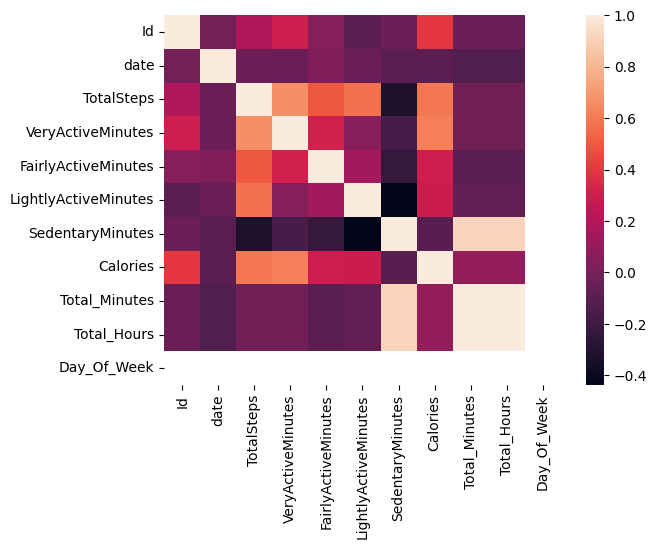

In [71]:
sns.heatmap(df.corr())

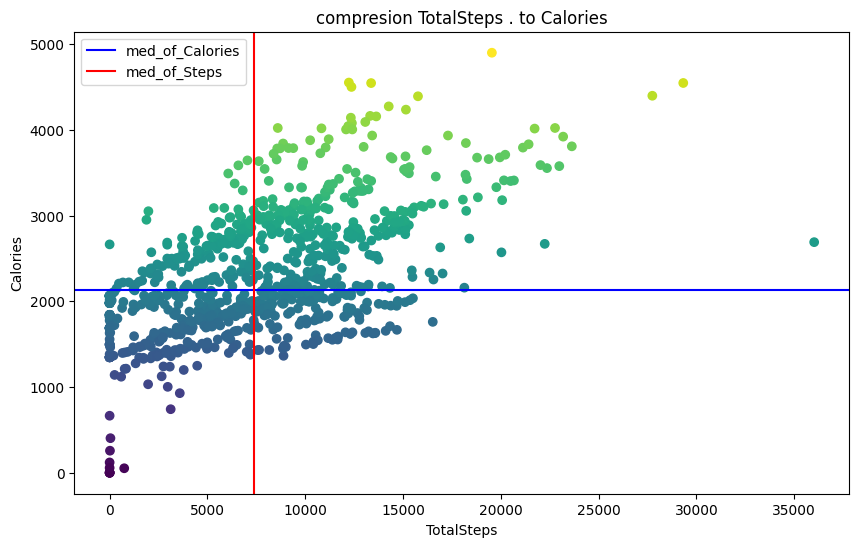

In [81]:
plt.figure(figsize=((10,6)))
plt.scatter(df['TotalSteps'] , df['Calories']  , c =df['Calories'] )
med_num_of_steps = df['TotalSteps'].median()
med_num_of_Calories = df['Calories'].median()
plt.axhline(med_num_of_Calories ,  c = 'b' , label = 'med_of_Calories')
plt.axvline(med_num_of_steps ,  c = 'r' , label = 'med_of_Steps')
plt.title('compresion TotalSteps . to Calories')
plt.xlabel('TotalSteps')
plt.ylabel('Calories')
plt.legend()
plt.show()

There is outlayers  in case of 35000 step theore is just 3000 Calories and in 0 step there is Calories bettween 100 and 1000

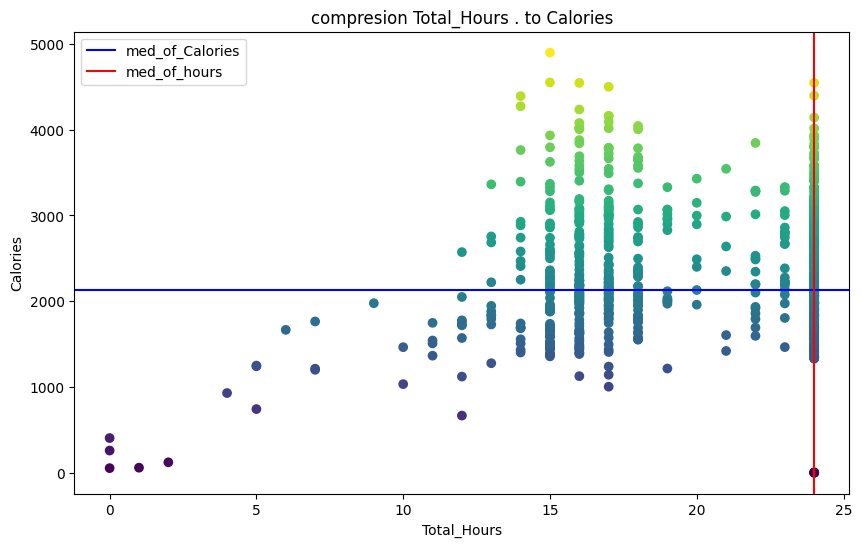

In [80]:
plt.figure(figsize=((10,6)))
plt.scatter(df['Total_Hours'] , df['Calories']  , c =df['Calories'] )
med_num_of_hours = df['Total_Hours'].median()
med_num_of_Calories = df['Calories'].median()
plt.axhline(med_num_of_Calories ,  c = 'b' , label = 'med_of_Calories')
plt.axvline(med_num_of_hours ,  c = 'r' , label = 'med_of_hours')
plt.title('compresion Total_Hours . to Calories')
plt.xlabel('Total_Hours')
plt.ylabel('Calories')
plt.legend()
plt.show()